In [164]:
import urllib.request
from bs4 import BeautifulSoup

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'

resp = urllib.request.urlopen(url)

data = resp.read()
src = data.decode('euc-kr')

html = BeautifulSoup(src,'html.parser')
# print(html)

crawling_data = []

news = html.select('.cluster_text_headline')
# print(news)

for news_data in news:
    crawling_data.append(news_data.string.strip())
    
#print(crawling_data)
from re import sub,findall

def clean_text(text):
    texts_re = [t.lower() for t in text]
    texts_re2 = [sub('[0-9]', '', text) for text in texts_re]
    texts_re3 = [sub('[\[\]?!,.:;“”\'\"]', '', text) for text in texts_re2]
    texts_re4 = [sub('[@#$%^&*()/]', '', text) for text in texts_re3]
    texts_re5 = [''.join(findall('[^a-z]',text))for text in texts_re4]
    texts_re6 = [' '.join(text.split()) for text in texts_re5]
    return texts_re6

clean_texts = clean_text(crawling_data)
#print(clean_texts)
word_count = {}

for text in clean_texts:
    for word in text.split():
        word_count[word] = word_count.get(word, 0) + 1
        
word_count


{'文': 2,
 '일': 2,
 '임시회서': 1,
 '예비비': 4,
 '처리…억': 1,
 '늘어난': 1,
 '억': 2,
 '우선': 1,
 '승인': 1,
 '집무실': 1,
 '최대한': 1,
 '빨리': 1,
 '처리…정부': 1,
 '내일': 2,
 '국무회의종합': 1,
 '‘집무실': 1,
 '이전’': 1,
 '국무회의': 1,
 '처리': 1,
 '지연': 1,
 '인수위': 8,
 '용산': 1,
 '또는': 1,
 '모레': 1,
 '임시국회서': 1,
 '처리될': 1,
 '것': 3,
 '국정과제': 2,
 '선정': 1,
 '후속작업': 1,
 '중…민주당': 1,
 '공약도': 1,
 '검토': 2,
 '국민': 1,
 '건의': 1,
 '타당': 1,
 '공약': 3,
 '등도': 1,
 '포함해': 1,
 '윤석열': 1,
 '당선인': 4,
 '선거': 1,
 '국정과제에': 2,
 '반영될': 1,
 '수': 1,
 '있도록': 1,
 '점검해': 1,
 '달라': 1,
 '尹': 1,
 '제대로': 1,
 '반영돼야국민': 1,
 '전체보고': 1,
 '일해달라': 1,
 '심야시간': 1,
 '스쿨존': 2,
 '제한속도': 2,
 '최대': 1,
 '상향': 2,
 '속보': 2,
 '안전속도': 2,
 '정책': 4,
 '완화제한속도': 1,
 '시속': 1,
 '까지': 2,
 '완화일부': 1,
 '느슨해지는': 1,
 '김건희': 5,
 '여사': 2,
 '공개': 2,
 '활동': 2,
 '움직임…에': 1,
 '반려묘·文대통령': 1,
 '사진도': 1,
 '공개활동': 1,
 '신호탄': 1,
 '‘후드티’': 1,
 '사진…인스타그램도': 1,
 '다시': 1,
 '열어': 1,
 '인스타도': 1,
 '전환…취임': 1,
 '전': 2,
 '시작하나': 1,
 '후드티에': 1,
 '청바지': 1,
 '입은': 1,
 '여사…공식행보': 1,
 '임박': 2,
 '靑': 1,
 '월': 1,
 '북

文 2
일 2
예비비 4
억 2
내일 2
인수위 8
것 3
국정과제 2
검토 2
공약 3
당선인 4
국정과제에 2
스쿨존 2
제한속도 2
상향 2
속보 2
안전속도 2
정책 4
까지 2
김건희 5
여사 2
공개 2
활동 2
전 2
임박 2
북악산 2
약속 2
년 2
법무부 2
보고 2
문 2
대통령 2
모범사례 2
원내대표 2
출마 5
선언 2
권성동 2
국민의힘 2
김은혜 5
조응천 2
유승민 2
김여정 2
박홍근 2
고문료 2
기준에 2
경기지사 2
장제원 2
뉴스썰기 4
[('인수위', 8), ('김건희', 5), ('출마', 5), ('김은혜', 5), ('예비비', 4)]
원형 차트


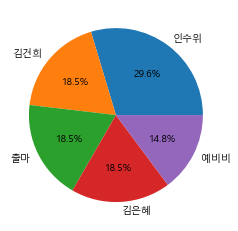

In [166]:
import sqlite3

try:
    conn = sqlite3.connect('data/word_count')
    
    cursor = conn.cursor()
    
    sql = 'create table if not exists word_count\
        (word text(30), count integer)'
        
    cursor.execute(sql)
    
    for word,count in word_count.items():
        if count >= 2:
            print(word,count)
            cursor.execute(f"insert into word_count values\
                ('{word}',{count})")
    conn.commit()
    
    cursor.execute('select * from word_count order by count desc limit 5')
    rows = cursor.fetchall()
    print(rows)
    words = []
    counts = []
    for row in rows:
        words.append(row[0])
        counts.append(row[1])
        
    import matplotlib.pyplot as plt

    ## 차트에서 한글 지원
    from matplotlib import font_manager,rc
    font_name = font_manager.FontProperties(
        fname="C:/Windows/Fonts/malgun.ttf").get_name()     

    rc('font',family=font_name)     
    
    ## 원형 그래프
    print('원형 차트')
    plt.pie(counts,labels=words,autopct='%.1f%%')
    plt.show()
except Exception as e:
    print('DB 오류 발생 : ',e)
    cursor.rollback()
finally:
    conn.close()
